In [11]:
import PIL.Image
import os
import numpy as np

In [5]:
imgs_dir = 'EE6222_frames'
dirs = ['Pick', 'Turn', 'Stand', 'Pour', 'Walk', 'Drink', 'Sit', 'Jump', 'Push', 'Run']

In [20]:
import math
class RunningStats:

    def __init__(self):
        self.n = 0
        self.old_m = 0
        self.new_m = 0
        self.old_s = 0
        self.new_s = 0

    def clear(self):
        self.n = 0

    def push(self, x):
        self.n += 1

        if self.n == 1:
            self.old_m = self.new_m = x
            self.old_s = 0
        else:
            self.new_m = self.old_m + (x - self.old_m) / self.n
            self.new_s = self.old_s + (x - self.old_m) * (x - self.new_m)

            self.old_m = self.new_m
            self.old_s = self.new_s

    def mean(self):
        return self.new_m if self.n else 0.0

    def variance(self):
        return self.new_s / (self.n - 1) if self.n > 1 else 0.0

    def standard_deviation(self):
        return math.sqrt(self.variance())

In [64]:
from tqdm.notebook import tqdm

In [66]:
rs = [RunningStats(), RunningStats(), RunningStats()]
v = [np.vectorize(rs[0].push), np.vectorize(rs[1].push), np.vectorize(rs[2].push)]
psum    = np.array([0.0, 0.0, 0.0])
psum_sq = np.array([0.0, 0.0, 0.0])
count = 0
for d in tqdm(dirs):
    curr_dir = os.path.join(imgs_dir, d)
    for vid_dir in tqdm(os.listdir(curr_dir)):
        current_vid_dir = os.path.join(curr_dir, vid_dir)
        for im in os.listdir(current_vid_dir):
            img = np.asarray(PIL.Image.open(os.path.join(current_vid_dir, im))) / 255.
            count += img.shape[0] * img.shape[1]
            psum += img.sum(0).sum(0)
            psum_sq += (img ** 2).sum(0).sum(0)
    # mean and std
    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = np.sqrt(total_var)
    print(f'Class {d} Mean={total_mean} Std={total_std}')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Class Pick Mean=[0.07336631 0.06840362 0.06623222] Std=[0.06415211 0.06352223 0.05751301]


  0%|          | 0/59 [00:00<?, ?it/s]

Class Turn Mean=[0.07111563 0.0668264  0.06349112] Std=[0.06088984 0.05964914 0.05194326]


  0%|          | 0/45 [00:00<?, ?it/s]

Class Stand Mean=[0.07291165 0.06882687 0.06522454] Std=[0.06604741 0.06380604 0.05512173]


  0%|          | 0/89 [00:00<?, ?it/s]

Class Pour Mean=[0.06129758 0.05697548 0.05529197] Std=[0.06043863 0.05804459 0.0501713 ]


  0%|          | 0/106 [00:00<?, ?it/s]

Class Walk Mean=[0.06860959 0.06384048 0.06188806] Std=[0.07647645 0.07238131 0.06529024]


  0%|          | 0/93 [00:00<?, ?it/s]

Class Drink Mean=[0.0691235  0.06403787 0.06269831] Std=[0.08085037 0.0764118  0.07008802]


  0%|          | 0/51 [00:00<?, ?it/s]

Class Sit Mean=[0.06660046 0.06190603 0.06075144] Std=[0.07780323 0.07353399 0.06759821]


  0%|          | 0/94 [00:00<?, ?it/s]

Class Jump Mean=[0.06717041 0.06252519 0.06150974] Std=[0.07982741 0.07559102 0.06958507]


  0%|          | 0/97 [00:00<?, ?it/s]

Class Push Mean=[0.06909937 0.06464864 0.06335806] Std=[0.08236151 0.07882398 0.07253347]


  0%|          | 0/55 [00:00<?, ?it/s]

Class Run Mean=[0.0702773  0.06571121 0.06437492] Std=[0.08475896 0.08116068 0.07479476]


In [68]:
Mean=[0.0702773, 0.06571121, 0.06437492] 
Std=[0.08475896, 0.08116068, 0.07479476]

In [130]:
clip_mean_light = [0.485, 0.456, 0.406]
clip_std_light = [0.229, 0.224, 0.225]

In [114]:
import matplotlib.pyplot as plt
import random

In [134]:
# get random img
rand_class = random.sample(dirs, 1)[0]
curr_dir = os.path.join(imgs_dir, rand_class)
rand_vid = random.sample(os.listdir(curr_dir), 1)[0]
current_vid_dir = os.path.join(curr_dir, rand_vid)
rand_img = random.sample(os.listdir(current_vid_dir), 1)[0]
print(f"{rand_vid} {rand_img}")
img = np.asarray(PIL.Image.open(os.path.join(current_vid_dir, rand_img))) / 255.

# good examples:
# Stand_5_5 img_00027.jpg

Stand_5_5 img_00027.jpg


In [199]:
def plot_comparison(img):
    processed_img = (((img - Mean) / Std ) * clip_std_light ) + clip_mean_light
    processed_img = (processed_img * 255.).astype(int)
    gamma_img = img_transforms.gamma_intensity_correction((img * 255.).astype(np.uint8), 3)
    histo_img = img_transforms.histogram_normalization((img * 255.).astype(np.uint8))
    # plt.figure(figsize=(12,6))
    # fig, ax = plt.subplots(2, 2)
    plt.imshow(np.clip(img, 0, 1))
    plt.axis('off')
    plt.savefig("fig1_ori.pdf", bbox_inches='tight')
    plt.imshow(np.clip(processed_img, 0, 255))
    plt.axis('off')
    plt.savefig("fig1_darkstd.pdf", bbox_inches='tight')
    plt.imshow(gamma_img)
    plt.axis('off')
    plt.savefig("fig1_gamma3.pdf", bbox_inches='tight')
    plt.imshow(histo_img)
    plt.axis('off')
    plt.savefig("fig1_histo.pdf", bbox_inches='tight')

In [195]:
import img_transforms

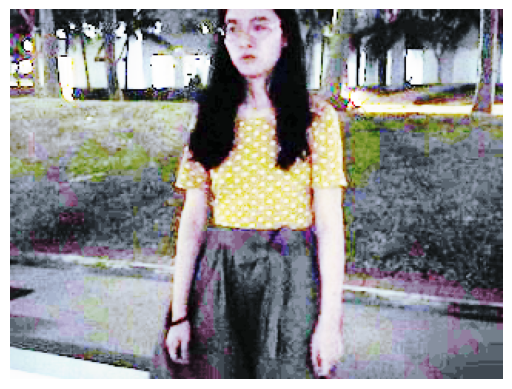

In [200]:
plot_comparison(img)

In [140]:
img = np.asarray(PIL.Image.open(os.path.join(current_vid_dir, 'img_00030.jpg'))) / 255.

(-0.5, 319.5, 239.5, -0.5)

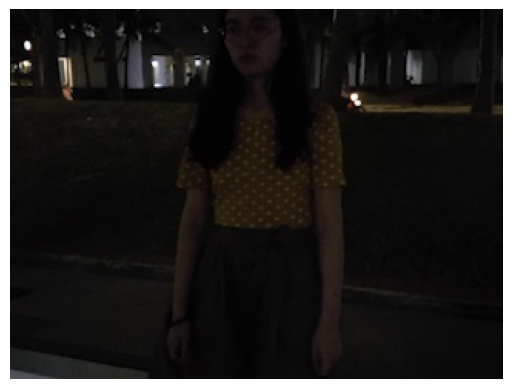

In [141]:
plt.imshow(img)
plt.axis('off')

In [201]:
count = 0
for d in tqdm(dirs):
    curr_dir = os.path.join(imgs_dir, d)
    for vid_dir in tqdm(os.listdir(curr_dir)):
        # current_vid_dir = os.path.join(curr_dir, vid_dir)
        count = count + 1

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

In [202]:
count

750